# Clustering

## Inter cluster distance map

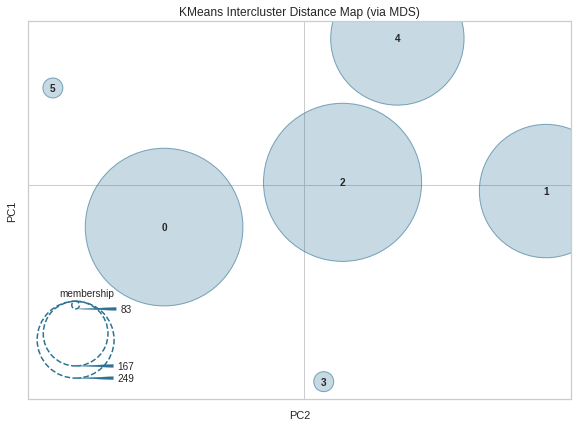

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [4]:
# Generate data and initialize the model
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)
model = KMeans(6)

import yellowbrick.cluster

visualizer = yellowbrick.cluster.InterclusterDistance(model, size = (700, 500))
visualizer.fit(X)
visualizer.show()

## Elbow plot

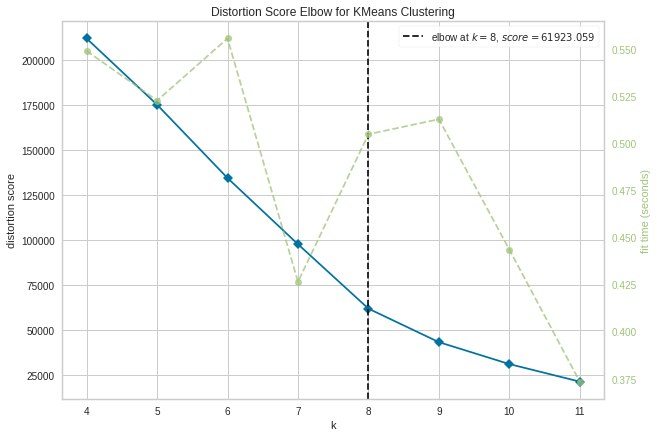

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Generate data and import the model
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)

import yellowbrick.cluster

visualizer = yellowbrick.cluster.KElbowVisualizer(
    KMeans(), 
    k = (4, 12), 
    metric ="distortion", 
    size = (700, 500))
visualizer.fit(X)
visualizer.show()

## Clustering heatmap

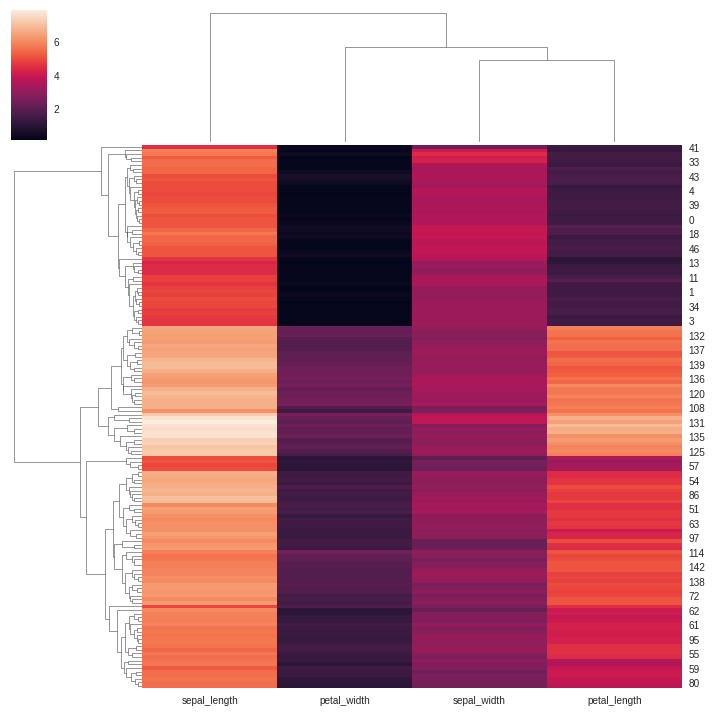

In [30]:
# Load the dataset
import seaborn as sns
data = sns.load_dataset("iris")
data.pop("species")

import seaborn as sns

heatmap = sns.clustermap(data)

## Parallel coordinates plot

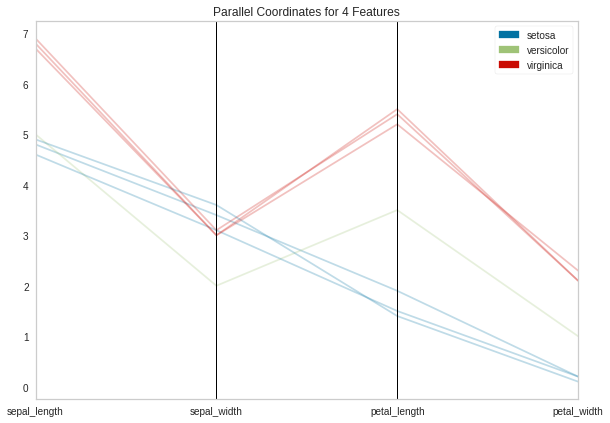

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [52]:
# Load the dataset
import seaborn as sns
X = sns.load_dataset("iris")
y = X.pop("species")
# Get lists of feature names and class names
features = list(X.columns)
classes = list(y.unique())

import yellowbrick.features

visualizer = yellowbrick.features.ParallelCoordinates(
    classes = classes, 
    features = features, 
    sample = 0.05, 
    shuffle = True, 
    size = (700, 500))
visualizer.fit_transform(X, y)
visualizer.show()

# Feature analysis

## Beeswarm plot

devel is an invalid version and will not be supported in a future release
2.10.1.Ludicrous.Lemur is an invalid version and will not be supported in a future release
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


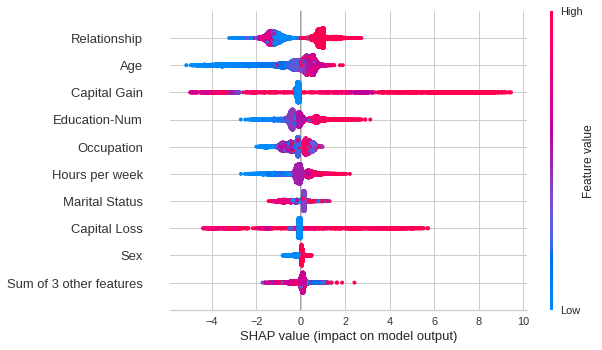

In [54]:
# Load data and train the model
import shap
import xgboost
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

## Waterfall plot

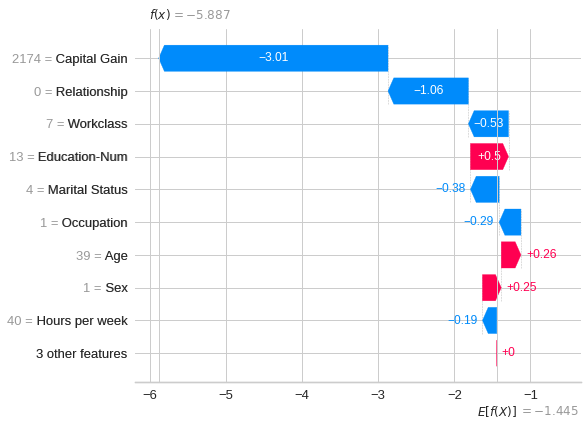

In [56]:
# Load data and train the model
import shap
import xgboost
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

# Classification

## Correlation matrix

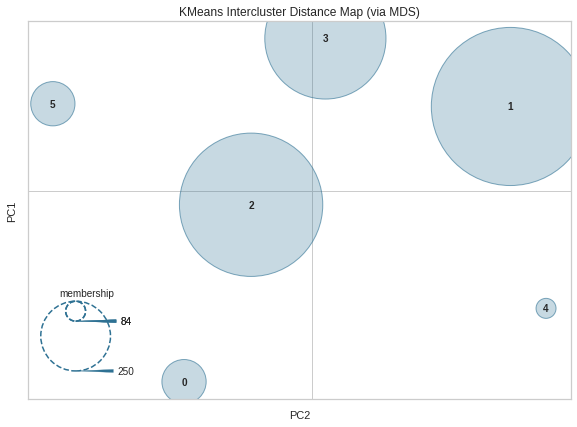

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [57]:
# Generate data and initialize the model
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)
model = KMeans(6)

import seaborn as sns
import numpy as np

sns.set_theme()

data = sns.load_dataset("iris")

mask = np.triu(np.ones_like(data.corr(), dtype = bool))
fig = sns.heatmap(data.corr(), 
                  mask = mask,  
                  cmap="YlGnBu", 
                  annot=True, 
                  vmax = 0.3, 
                  center = 0, 
                  square = True, 
                  linewidths = 0.5, 
                  cbar_kws = {'shrink':0.5})